<a href="https://colab.research.google.com/github/hfzizzulhaq24/bank_churn_prediction/blob/main/ASS_Bank_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

%matplotlib inline

# Read The Data

| **Nama Kolom**    | **Deskripsi**                                                                |
| ----------------- | ---------------------------------------------------------------------------- |
| `CustomerID`      | Pengenal unik untuk setiap pelanggan                                         |
| `Surname`         | Nama keluarga atau nama belakang pelanggan                                   |
| `CreditScore`     | Nilai numerik yang mewakili skor kredit pelanggan                            |
| `Geography`       | Negara tempat pelanggan tinggal (misalnya: Prancis, Spanyol, Jerman)         |
| `Gender`          | Jenis kelamin pelanggan (Pria atau Wanita)                                   |
| `Age`             | Usia pelanggan                                                               |
| `Tenure`          | Jumlah tahun pelanggan telah menjadi nasabah bank                            |
| `Balance`         | Saldo rekening pelanggan                                                     |
| `NumOfProducts`   | Jumlah produk bank yang digunakan pelanggan (contoh: rekening, kartu kredit) |
| `HasCrCard`       | Apakah pelanggan memiliki kartu kredit (1 = ya, 0 = tidak)                   |
| `IsActiveMember`  | Apakah pelanggan adalah anggota aktif (1 = ya, 0 = tidak)                    |
| `EstimatedSalary` | Perkiraan gaji pelanggan                                                     |
| `Exited`          | Apakah pelanggan telah berhenti berlangganan (1 = ya, 0 = tidak)             |


In [ ]:
df_bank = pd.read_csv('/content/Churn_Modelling.csv')
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Preprocessing Data

In [ ]:
# Remove fearture yang tidak terpakai
df_bank.set_index(['RowNumber','CustomerId','Surname'], inplace=True)

In [ ]:
df_bank.sample(3)

,,,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,CustomerId,Surname,,,,,,,,,,,
1704,15750466,Rhodes,790,Germany,Male,42,1,85839.62,1,1,0,198182.73,0
3243,15729908,Allan,411,France,Female,36,10,0.00,1,0,0,120694.35,0
359,15633950,Yen,737,France,Male,41,1,101960.74,1,1,1,123547.28,0


In [ ]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
# Check Missing Value
df_bank.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Tidak terdapat missing value

In [ ]:
# Check Data Duplicate
df_bank.duplicated().sum()

np.int64(0)

Tidak terdapat data terduplikat

In [ ]:
df_bank['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df_bank['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# Mengubah data kategorik
df_bank['Gender'].replace(['Male','Female'], [1,0], inplace=True)
df_bank['Geography'].replace(['France','Germany','Spain'], [2,1,0], inplace=True)

/tmp/ipython-input-3329034750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Gender'].replace(['Male','Female'], [1,0], inplace=True)
/tmp/ipython-input-3329034750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['Gender'].replace(['Male','Female'], [1,0], inplace=True)
/tmp

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (np.int64(1), np.int64(15634602), 'Hargrave') to (np.int64(10000), np.int64(15628319), 'Walker')
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.6+ MB


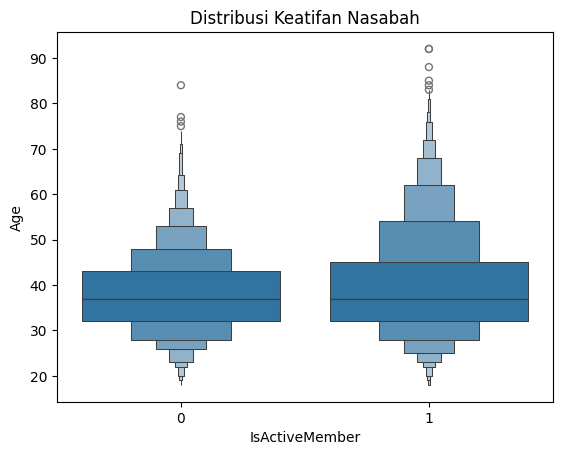

In [ ]:
sns.boxenplot(data=df_bank, x='IsActiveMember', y='Age')
plt.title('Distribusi Keatifan Nasabah')
plt.show()

In [ ]:
df_bank['AgeGroup'] = pd.cut(df_bank['Age'], bins=[17, 31, 71, 100], labels=['Muda', 'Dewasa', 'Lansia'])

In [ ]:
df_bank['AgeGroup'].value_counts()

,count
AgeGroup,
Dewasa,7522
Muda,2372
Lansia,106


In [ ]:
df_bank['AgeGroup'].replace(['Muda','Dewasa','Lansia'], [0,1,2], inplace=True)
df_bank['AgeGroup'] = pd.to_numeric(df_bank['AgeGroup'])

/tmp/ipython-input-3498099663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['AgeGroup'].replace(['Muda','Dewasa','Lansia'], [0,1,2], inplace=True)
/tmp/ipython-input-3498099663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['AgeGroup'].replace(['Muda','Dewasa','Lansia'], [

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (np.int64(1), np.int64(15634602), 'Hargrave') to (np.int64(10000), np.int64(15628319), 'Walker')
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  AgeGroup         10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.7+ MB


In [ ]:
df_bank.head()

,,,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
RowNumber,CustomerId,Surname,,,,,,,,,,,,
1,15634602,Hargrave,619,2,0,42,2,0.00,1,1,1,101348.88,1,1
2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,1
3,15619304,Onio,502,2,0,42,8,159660.80,3,1,0,113931.57,1,1
4,15701354,Boni,699,2,0,39,1,0.00,2,0,0,93826.63,0,1
5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,1


# Split The Data

In [ ]:
X = df_bank.drop('Exited', axis=1)
y = df_bank['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=42
)

# EDA

In [ ]:
X_train["Churn"] = y_train

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Exited,
0,0.79625
1,0.20375


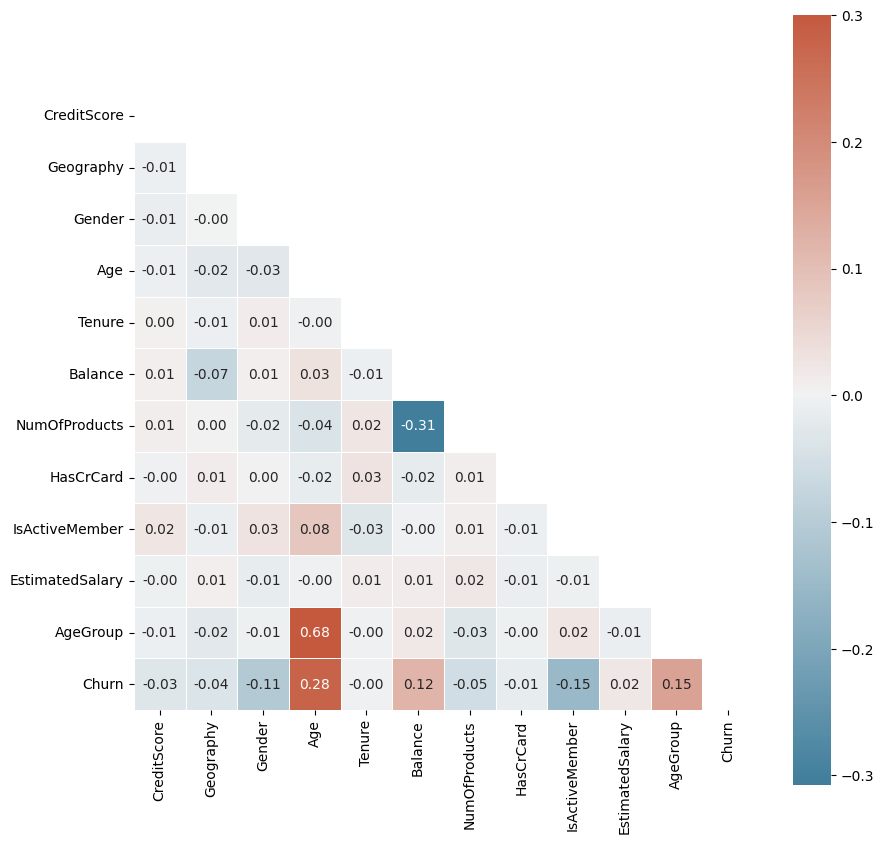

In [ ]:
# Check Multicol
corr = X_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=masking,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    fmt=".2f",
    linewidths=.5,
    annot=True,
);

## Categorical VS Exited

In [ ]:
def prop_agg(df, y, x):
  temp_df = df_bank.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

In [ ]:
prop_agg(X_train, "Gender", "Exited")

,Gender,Exited,size,prop
0,0,0,3404,0.749285
1,0,1,1139,0.250715
2,1,0,4559,0.835441
3,1,1,898,0.164559


In [ ]:
def facet_barplot(data, feats, x_label, y_label):
    """
    data: DataFrame that includes 'gender', x_label, and y_label
    x_label: column name to use for x-axis and hue
    y_label: column name to use for y-axis
    """

    unique_x = data[x_label].unique()
    palette = sns.color_palette("Set2", len(unique_x))

    g = sns.FacetGrid(data=data, col=feats, sharey=True)

    g.map_dataframe(
        sns.barplot,
        x=x_label,
        y=y_label,
        hue=x_label,
        palette=palette,
        order=sorted(unique_x)
    )

    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2,
                height,
                f'{height:.2f}',
                ha="center",
                va="bottom"
            )

    g.add_legend()
    plt.tight_layout()
    plt.show()

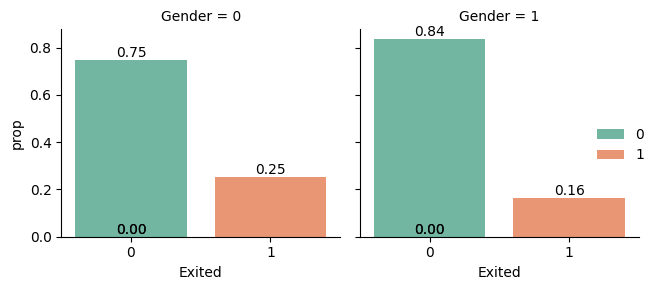

In [ ]:
feature = "Gender"

df = prop_agg(X_train, feature, "Exited")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Exited",
    y_label="prop"
)

Tidak terdapat perbeda signifikat natar Female[0] dan Male[1]

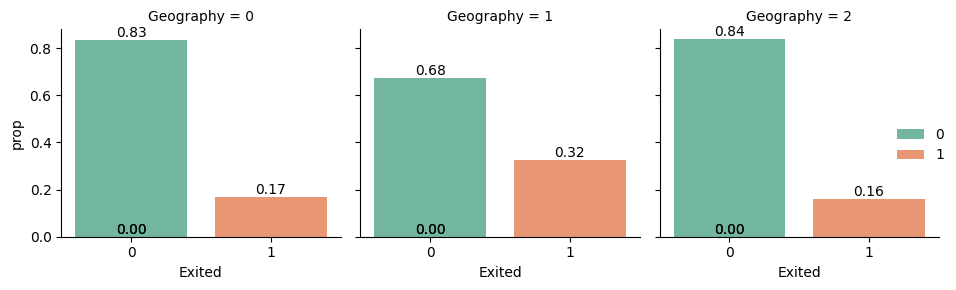

In [ ]:
feature = "Geography"

df = prop_agg(X_train, feature, "Exited")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Exited",
    y_label="prop"
)

Spain (0)

Germany (1)

France (2)

khusus German paling banyak Nasabah yang memutuskan untuk keluar, Spain dan France tidak ada perbedaan

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)


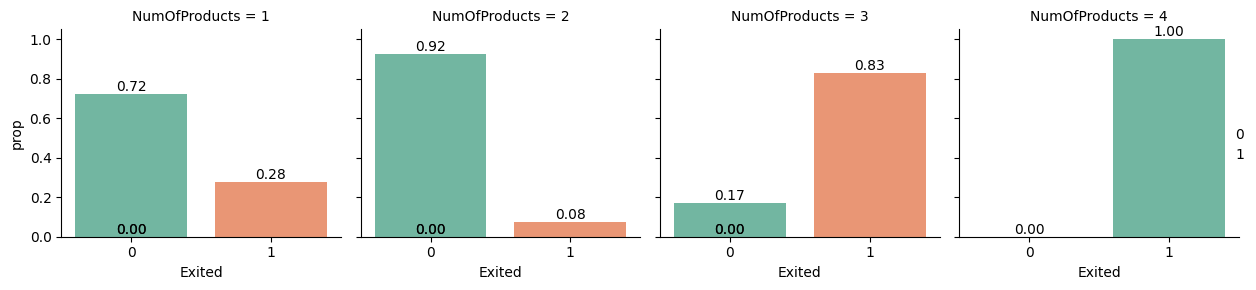

In [ ]:
feature = "NumOfProducts"

df = prop_agg(X_train, feature, "Exited")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Exited",
    y_label="prop"
)

Untuk Nasabah yang memiliki lebih dari 2 ProductC Card mayoritas keluar dari langganan mungkin di karenakan beban biaya yang dia dapatkan

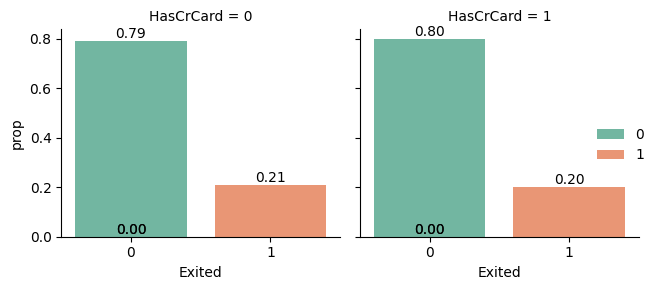

In [ ]:
feature = "HasCrCard"

df = prop_agg(X_train, feature, "Exited")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Exited",
    y_label="prop"
)

Tidak ada perbedaan signifikan terhadap nasabah yang memiliki Credit Card dan tidak

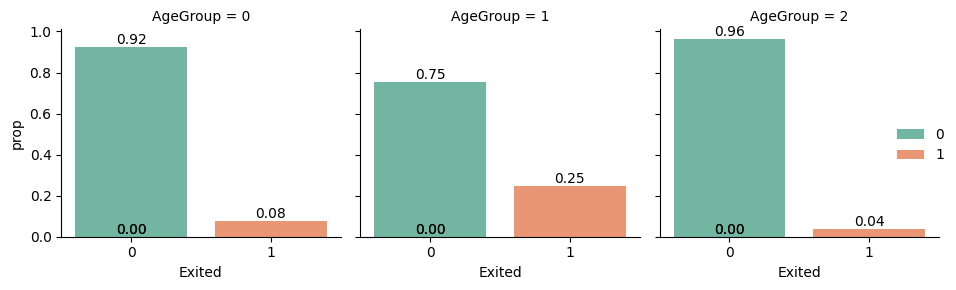

In [ ]:
feature = "AgeGroup"

df = prop_agg(X_train, feature, "Exited")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Exited",
    y_label="prop"
)

Muda [0]  Dewasa [1]  Lansia[2]

Untuk Dewasa memiliki jumlah yang lebih tinggi bagi nasabah yang keluar dari program member, dan untuk Muda dan Lansia tidak ada perbedaan yang signifikan

## Numeric vs Exited

In [ ]:
X_train["Exited"] = y_train

<Axes: xlabel='Exited', ylabel='Age'>

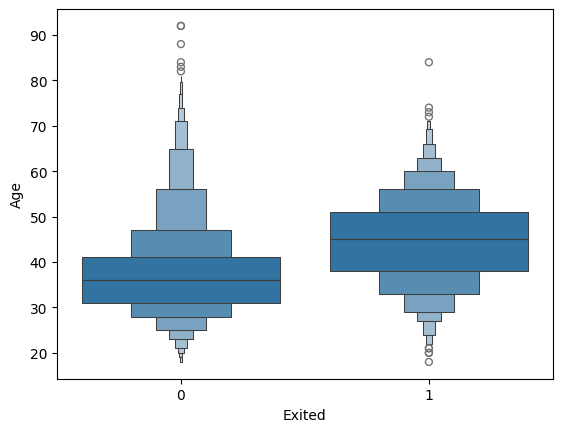

In [ ]:
sns.boxenplot(data = X_train , x='Exited', y='Age')

Untuk umur customer paling banyak melakukan Exited pada umur 35 - 58 thn


<Axes: xlabel='Exited', ylabel='Tenure'>

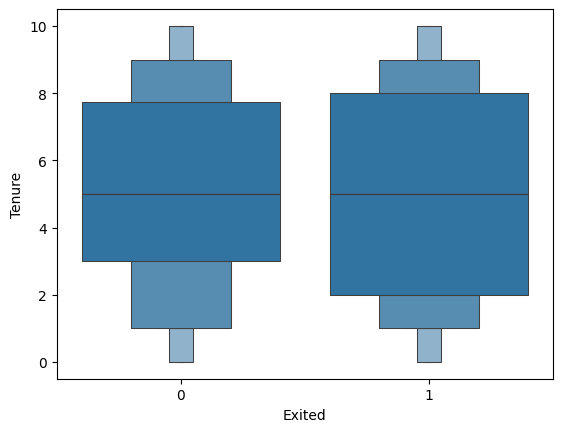

In [ ]:
sns.boxenplot(data = X_train , x='Exited', y='Tenure')

Untuk nasabah yang keluar mayoritas nasabah yang sudah menjadi member bank selama 2-8 thn

<Axes: xlabel='Exited', ylabel='Balance'>

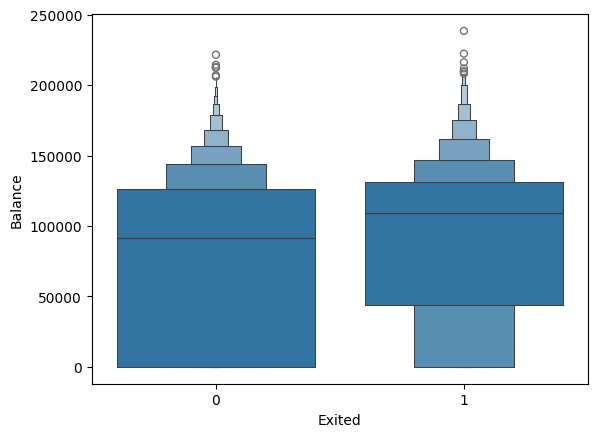

In [ ]:
sns.boxenplot(data = X_train , x='Exited', y='Balance')

Mayoritas nasabah yang keluar itu memiliki tabungan sekitar 50.000 - 150.00

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

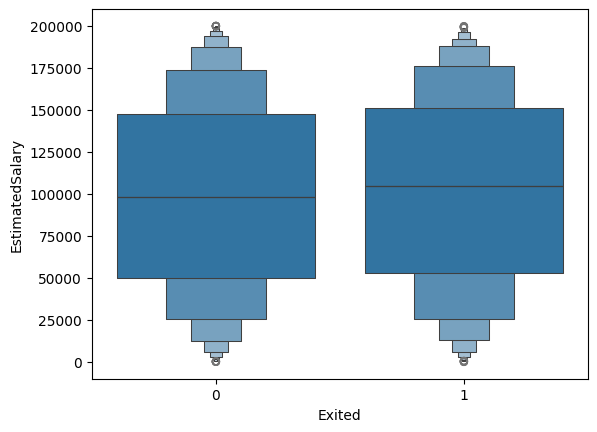

In [ ]:
sns.boxenplot(data = X_train , x='Exited', y='EstimatedSalary')

Perkiraan Salary nasabah, yang masih memilih untuk menetap dan memilih untuk keluar dari member itu hampir sama, tidak terlalu signifkan

In [ ]:
# Drop feature Target sebelum Modeling
X_train = X_train.drop(["Exited"], axis = 1)

# Modeling

In [ ]:
y_train.value_counts(normalize=True).reset_index()

,Exited,proportion
0,0,0.79625
1,1,0.20375


## Fitting Model

### kNN

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': (2,3,4,5,6,7,8)

}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)}, scoring='f1')

### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1')

### Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5),
    'class_weight': [{0: 0.20375, 1: 0.79625}]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 0.20375, 1: 0.79625}],
                         'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='f1')

### SVM

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'class_weight' : [{0: 0.20375, 1:0.79625}]
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': [{0: 0.20375, 1: 0.79625}]},
             scoring='f1')

### XGBoost

In [ ]:
param_grid_xgb = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'scale_pos_weight': [3.9]
}


grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5, scoring='f1')
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'scale_pos_weight': [3.9]},
             scoring='f1')

# Model Evaluation

In [ ]:
# knn prediction
knn_pred = grid_knn.predict(X_test)
knn_pred_proba = grid_knn.predict_proba(X_test)

# decision tree prediction
dc_pred = grid_dt.predict(X_test)
dc_pred_proba = grid_dt.predict_proba(X_test)

# random forest prediction
rf_pred = grid_rf.predict(X_test)
rf_pred_proba = grid_rf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = grid_svm.predict(X_test)
svm_pred_proba = grid_svm.predict_proba(X_test)

# XGBoost prediction
xgb_pred = grid_xgb.predict(X_test)
xgb_pred_proba = grid_xgb.predict_proba(X_test)

In [ ]:
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels if labels else sorted(set(y_true)),
                yticklabels=labels if labels else sorted(set(y_true)))

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.tight_layout()
    plt.show()

### kNN

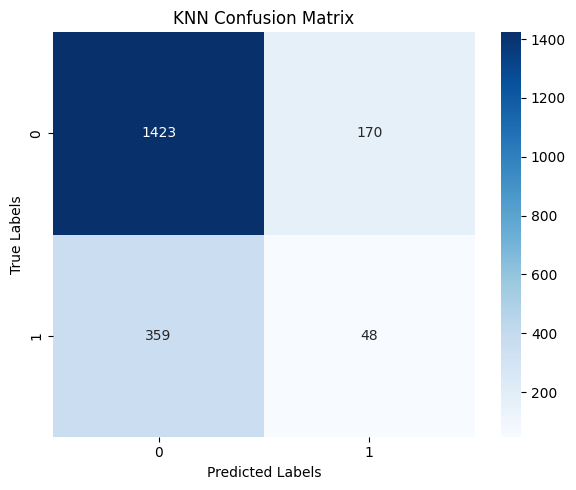

In [ ]:
plot_confusion_matrix(y_test, knn_pred, labels=[0, 1], title="KNN Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.798541,0.220183,0.7355,0.509362,0.680845
recall,0.893283,0.117936,0.7355,0.505610,0.735500
f1-score,0.843259,0.153600,0.7355,0.498430,0.702914
support,1593.000000,407.000000,0.7355,2000.000000,2000.000000


### Decision Tree

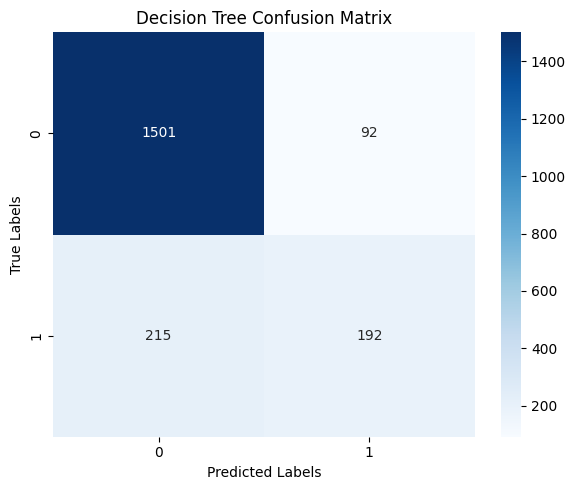

In [ ]:
plot_confusion_matrix(y_test, dc_pred, labels=[0, 1], title="Decision Tree Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.874709,0.676056,0.8465,0.775382,0.834283
recall,0.942247,0.471744,0.8465,0.706996,0.846500
f1-score,0.907223,0.555716,0.8465,0.731470,0.835691
support,1593.000000,407.000000,0.8465,2000.000000,2000.000000


### Random Forest

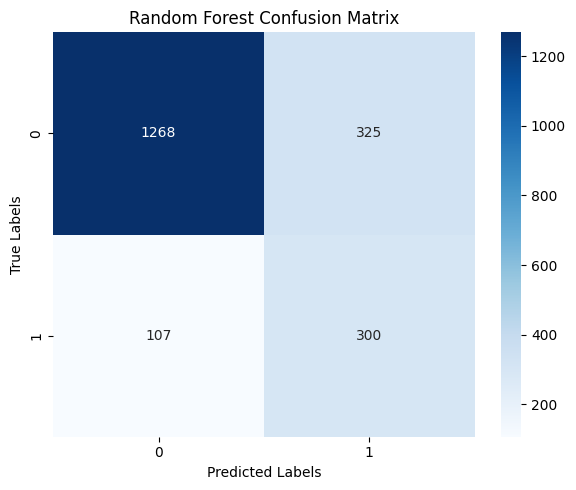

In [ ]:
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.922182,0.480000,0.784,0.701091,0.832198
recall,0.795982,0.737101,0.784,0.766542,0.784000
f1-score,0.854447,0.581395,0.784,0.717921,0.798881
support,1593.000000,407.000000,0.784,2000.000000,2000.000000


### SVM

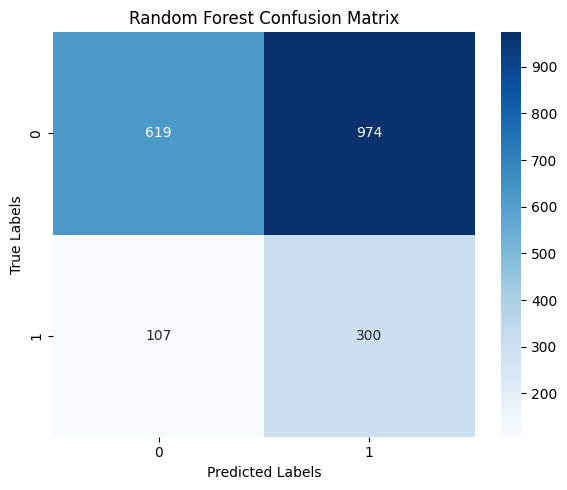

In [ ]:
plot_confusion_matrix(y_test, svm_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.852617,0.235479,0.4595,0.544048,0.727029
recall,0.388575,0.737101,0.4595,0.562838,0.459500
f1-score,0.533851,0.356930,0.4595,0.445391,0.497847
support,1593.000000,407.000000,0.4595,2000.000000,2000.000000


### XGBoost

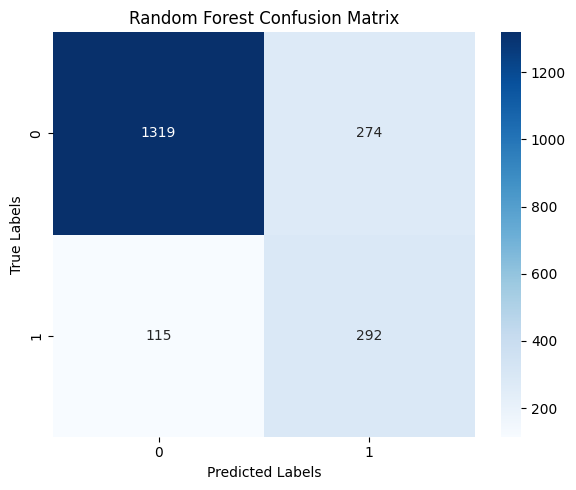

In [ ]:
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.919805,0.515901,0.8055,0.717853,0.837610
recall,0.827997,0.717445,0.8055,0.772721,0.805500
f1-score,0.871490,0.600206,0.8055,0.735848,0.816284
support,1593.000000,407.000000,0.8055,2000.000000,2000.000000


**Dari Ke 5 Model di atas, XGBoost yang memiliki nilai matrix yang paling bagus dan akan di lanjutkan sebagai acuan model predik selanjutnya**

**Intepretasi XGBoost Model** :


Model cukup baik mendeteksi pelanggan churn (recall 71.7%), meskipun banyak false positives (precision hanya 51.6%).

Accuracy 80.5% terlihat bagus, tapi class imbalance (Not Churn jauh lebih banyak dari Churn) membuat metrik seperti recall & f1-score lebih penting untuk evaluasi.

Metrik macro average (rata-rata antar kelas):

F1-score macro: 0.7358 cukup baik

Weighted avg: 0.8162 berarti model lebih bagus menangani kelas mayoritas

# Model Result

## Plot ROC dan Precision F1 Score Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_scores, title="ROC AUC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_precision_recall_with_opt_threshold(y_true, y_scores, title="Precision-Recall Curve"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, 1.0)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    best_f1 = f1_scores[best_index]

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {average_precision_score(y_true, y_scores):.2f}')
    plt.scatter(recall[best_index], precision[best_index],
                color='red', zorder=10,
                label=f'Best F1 = {best_f1:.2f}\nThreshold = {best_threshold:.2f}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_threshold

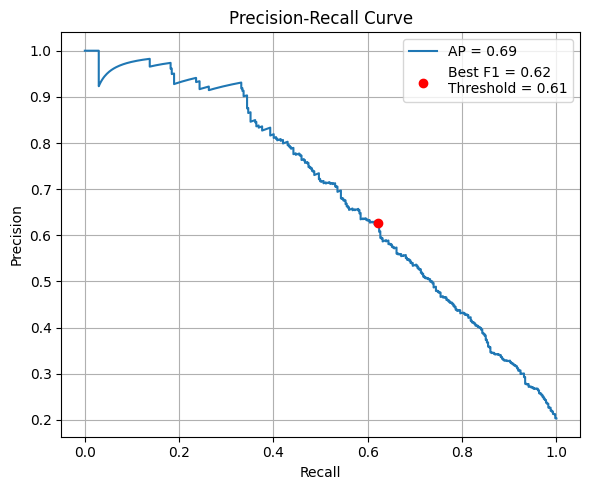

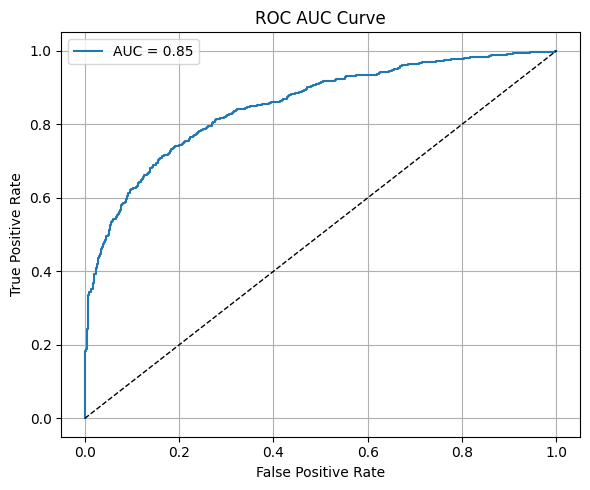

In [ ]:
y_proba = grid_xgb.predict_proba(X_test)[:, 1]

best_thresh = plot_precision_recall_with_opt_threshold(y_test, y_proba)
plot_roc_curve(y_test, y_proba)

Insight

* ROC AUC : model cukup baik dalam klasifikasi dengan nilai 0.85
* AVg Precision : sudah cukup baik untuk data ini dengan nilai 0.69
* Best F1 Score : 0.62 dengan Treshold optimal sekitar 0.61



In [ ]:
df_bank['probability_exited'] = grid_xgb.predict_proba(X)[:,1]
df_bank['predicted_exited'] = grid_xgb.predict(X)

In [ ]:
df_exited = df_bank[df_bank['probability_exited'] >= 0.8]
df_exited.head(10)df

,,,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,probability_exited,predicted_exited
RowNumber,CustomerId,Surname,,,,,,,,,,,,,,
3,15619304,Onio,502,2,0,42,8,159660.80,3,1,0,113931.57,1,1,0.989780,1
8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1,0,0.980869,1
17,15737452,Romeo,653,1,1,58,1,132602.88,1,1,0,5097.67,1,1,0.967470,1
19,15661507,Muldrow,587,0,1,45,6,0.00,1,0,0,158684.81,0,1,0.825190,1
31,15589475,Azikiwe,591,0,0,39,3,0.00,3,1,0,140469.38,1,1,0.806083,1
36,15794171,Lombardo,475,2,0,45,0,134264.04,1,1,0,27822.99,1,1,0.830577,1
42,15738148,Clarke,465,2,0,51,8,122522.32,1,0,0,181297.65,1,1,0.900120,1
59,15623944,T'ien,511,0,0,66,4,0.00,1,1,0,1643.11,1,1,0.929086,1
71,15703793,Konovalova,738,1,1,58,2,133745.44,4,1,0,28373.86,1,1,0.991556,1


In [ ]:
df_exited[(df_exited['probability_exited']>= 0.8) & (df_exited['AgeGroup'] >= 1) & (df_exited['NumOfProducts'] >= 3)]

,,,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,probability_exited,predicted_exited
RowNumber,CustomerId,Surname,,,,,,,,,,,,,,
3,15619304,Onio,502,2,0,42,8,159660.80,3,1,0,113931.57,1,1,0.989780,1
31,15589475,Azikiwe,591,0,0,39,3,0.00,3,1,0,140469.38,1,1,0.806083,1
71,15703793,Konovalova,738,1,1,58,2,133745.44,4,1,0,28373.86,1,1,0.991556,1
89,15622897,Sharpe,646,2,0,46,4,0.00,3,1,0,93251.42,1,1,0.980888,1
91,15757535,Heap,647,0,0,44,5,0.00,3,1,1,174205.22,1,1,0.989590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,15706458,Pan,812,1,1,39,5,115730.71,3,1,1,185599.34,1,1,0.970583,1
9748,15775761,Iweobiegbunam,610,1,0,69,5,86038.21,3,0,0,192743.06,1,1,0.970076,1
9801,15640507,Li,762,0,0,35,3,119349.69,3,1,1,47114.18,1,1,0.976240,1


Melihat dari hasil prediksi untuk nasabah yang melakukan Exit rata-rata di umur pada kelompok dewasa yang dimana kemungkinan mereka Exit dikarenakan memilih Bank atau Bank Digital lain yang menawarkan mereka seperti biaya admin yang murah, atau tempat dimana mereka dapat melakukan investasi untuk tabungan mereka karna umuer sekita 31-70thn adalah umur dimana mereka lebih memilih menginvestasikan uang mereka.

In [ ]:
df_exited[(df_exited['probability_exited']>= 0.80) & (df_exited['Balance'] >= 50000) & (df_exited['AgeGroup'] == 1) & (df_exited['NumOfProducts'] >= 3)]

,,,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,probability_exited,predicted_exited
RowNumber,CustomerId,Surname,,,,,,,,,,,,,,
3,15619304,Onio,502,2,0,42,8,159660.80,3,1,0,113931.57,1,1,0.989780,1
71,15703793,Konovalova,738,1,1,58,2,133745.44,4,1,0,28373.86,1,1,0.991556,1
228,15676895,Cattaneo,547,1,0,39,6,74596.15,3,1,1,85746.52,1,1,0.967272,1
238,15764866,Synnot,539,1,0,43,3,116220.50,3,1,0,55803.96,1,1,0.990428,1
272,15619955,Bevington,733,1,1,34,3,100337.96,3,1,0,48559.19,1,1,0.961906,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,15706458,Pan,812,1,1,39,5,115730.71,3,1,1,185599.34,1,1,0.970583,1
9748,15775761,Iweobiegbunam,610,1,0,69,5,86038.21,3,0,0,192743.06,1,1,0.970076,1
9801,15640507,Li,762,0,0,35,3,119349.69,3,1,1,47114.18,1,1,0.976240,1


Customer Retention Strategy for High-Risk Segment (184 Customers)

Terdapat 184 Customer dengan kriteria:

* Probability Exited > 80%
* Umur Dewasa di Usia Produktif ( 30 thn - 60 thn )
* Balance > 50.000 Euro
* Memiliki lebih dari 3 Product Card

Recomendation :

* Penawaran Investasi Jangka Panjang
Menyediakan program investasi khusus seperti sekuritas bank atau reksa dana untuk menarik minat nasabah agar tetap loyal dan terus bekerja sama dengan bank.

* Bonus Bunga untuk Saldo Tinggi
Memberikan bunga deposito khusus bagi nasabah dengan saldo di atas €50.000 guna mendorong mereka mempertahankan dananya di bank.

* Diskon Biaya Administrasi Berdasarkan Produk
Memberikan potongan atau pembebasan biaya administrasi bagi nasabah yang memiliki lebih dari 3 produk sebagai bentuk apresiasi atas loyalitas dan keterlibatan mereka.


